<a href="https://colab.research.google.com/github/DEli-26/DS_Practicum/blob/main/03_realty/proj_pract_03_realty_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6><b>**Проект Я.Практикум №3**</b></font>

<font size=6><b>**Яндекс.Недвижимость**</b></font>

***

# Постановка задачи

**Заказчик:** Яндекс.Недвижимость. 

**Цель:** провести исследования для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.

**Задачи:** 
1. установить параметры для определения рыночной стоимости объектов недвижимости.

**Исходные данные:** архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# Обзор данных

Загрузим библиотеки, необходимые для выполнения проекта

In [ ]:
!pip install nb_black
%load_ext nb_black
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# отображение таблиц без ограничения на количество столбцов:
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

Исходные данные находятся в файле `real_estate_data.csv`. Предварительный ананлиз файла показал, что данные разделены символом `\t`. Откроем файл и выведем первые 5 строк датафрейма.

-- Здесь был код для загрузки данных --

Получим общую информацию по датафрейму.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<IPython.core.display.Javascript object>

Всего в датафрейме 21 столбец и 23699 строка, при этом используются следующие типы данных: логический `bool`, целочисленный `int64`, вещественный `float64` и текстовый `object`. 

Согласно условиям задания, часть столбцов заполняется пользователями, а часть автоматически. К **первой** группе будем относить столбцы:

* `total_images` — число фотографий квартиры в объявлении, 
* `last_price` — цена на момент снятия с публикации, 
* `total_area` — площадь квартиры в квадратных метрах (м²), 
* `first_day_exposition` — дата публикации, 
* `rooms` — число комнат, 
* `ceiling_height` — высота потолков (м), 
* `floors_total`— всего этажей в доме, 
* `living_area` — жилая площадь в квадратных метрах (м²), 
* `floor` — этаж, 
* `is_apartment` — апартаменты (булев тип), 
* `studio` studio — квартира-студия (булев тип), 
* `open_plan` — свободная планировка (булев тип), 
* `kitchen_area` — площадь кухни в квадратных метрах (м²), 
* `balcony` — число балконов, 

а ко **второй**:

* `locality_name` — название населённого пункта, 
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м), 
* `cityCenters_nearest` — расстояние до центра города (м), 
* `parks_around3000` — число парков в радиусе 3 км, 
* `parks_nearest` — расстояние до ближайшего парка (м), 
* `ponds_around3000` — число водоёмов в радиусе 3 км, 
* `ponds_nearest` — расстояние до ближайшего водоёма (м), 
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

Во многих столбцах присутствуют пропуски, а такое разделение поможет при определении причин пропусков и анализа аномалий в указанных столбцах.

В наименованиях второй группы столбцов встречаются нарушения стиля - верблюжий стиль и отсутствие разделителей между словами и цифрами.

Для следующих столбцов целесообразно изменить тип на `int`:
`floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. Для первых двух из перечисленных столбцов такое решение обосновывается отсутствием дробных значений в принципе, для последнего - удобством анализа данных, а для остальных - отсутствием дробных значений в самом датафрейме. 

Для столбца `first_day_exposition` целесообразно изменить тип на `datetime`, что позволит производить дальнейшие расчеты с ним.

Тип данных в столбце `is_apartment` следует привести в соответствие с описанием содержимого и заменить на `bool`.

**Выводы**

В каждой строке таблицы — данные об объявлениях о продаже квартир. Часть колонок описывает сведения о самом объекте: площадь, количество комнат, этажей, высота потолка и др. Часть - описывает территориальное расположение объекта - удаление от аэропорта, центра города, парков, прудов и их количество. Остальные данные рассказывают об объявлении - цена, количество фотографий, дата первого размещения и общее количество дней.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Однако встречаются неправильные наименования столбцов, неправильный тип и пропуски в данных, а также возможно проявление дубликатов и других аномалий. Чтобы двигаться дальше, нужно устранить перечисленные проблемы в данных.

# Предобработка данных

Проведем предобработку в следующей последовательности:

1. Исправление наименований столбцов; 
3. Исключение дубликатов;
2. Обработка пропусков;
1. Исправление типов данных;
1. Добавление данных.

## Исправление наименований столбцов

Исправление наименований столбцов выполним при помощи метода `rename()`.

In [ ]:
df = df.rename(
    columns={
        "cityCenters_nearest": "city_centers_nearest",
        "parks_around3000": "parks_around_3000",
        "ponds_around3000": "ponds_around_3000",
    }
)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<IPython.core.display.Javascript object>

Переименование прошло успешно.

## Исключение дубликатов

Количество явных дубликатов равно:

In [ ]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

Полученное значение говорит об отсутствии явных дубликатов. 

Единственный столбец во всем датафрейме, в котором могут содержаться неявные дубликаты - это `locality_name`. Выведем список значений в нем

In [ ]:
df.locality_name.value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

<IPython.core.display.Javascript object>

Общее количество значений составляет 353, что затруднительно анализировать "вручную" на наличие неявных дублиактов. В то же время, из полученного списка очевидны потенциальные причины проявления таких дубликатов - это чередование строчных и заглавных букв, а также "ё" и "е". Для исключения указанных "слабых мест" приведем все значения в столбце к нижнему регистру и произведем замену "ё" на "е".

In [ ]:
df.locality_name = df.locality_name.str.lower()
df.locality_name = df.locality_name.str.replace("ё", "е")

df.locality_name.nunique()

330

<IPython.core.display.Javascript object>

Проведенная обработка позволила исключить 34 неявных дубликата в столбце `locality_name`.

## Обработка пропусков

Пропуски присутствуют в следующих столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`, `days_exposition`. 

### Пропуски в столбцах из **первой** группы

<div class="alert-info">
<b>Комментарий студента V2</b>

Ниже дано пояснение по пропускам в ceiling_height.</div>

Пропуски в столбцах из **первой** группы, по всей видимости, вызваны человеческим фактором - отсутствием информации у пользователя или нежеланием ее предоставлять. Например, в столбце `ceiling_height` пропуски вызваны, именно отсутствием информации - далеко не каждый помнит высоту своих потолков. При этом, количество пропусков составляет около 40%, а следовательно их исключение из датафрейма приведет к существенному искажению результатов. Кроме того, учитывая, что такая информация может влиять на стоимость объекта, заменять пропуски на какое-либо значение может так же привести к искажению результатов. 

Пропуски в столбцах `living_area` и `kitchen_area`, аналогично пропускам в столбце `ceiling_height`, могут быть обусловлены отсутствием информации у пользователя. Тем не менее они обладают высокой корреляцией со значениями в столбце `total_area`:

In [ ]:
df["total_area"].corr(df["kitchen_area"])

0.6091211711198316

<IPython.core.display.Javascript object>

In [ ]:
df["total_area"].corr(df["living_area"])

0.9395373338721494

<IPython.core.display.Javascript object>

Таким образом, пропуски в столбцах `living_area` и `kitchen_area` можно восстановить аппроксимацией. Для этого заменим их на значение `-1` и обработаем при помощи функциЙ `rep_liv_area` и `rep_ktch_area`, которая находит все значения `-1` и восстанавливает вместо них значение общей площади, умноженное на коэффициент взаимосвязи. Последний рассчитаем, как отношение медианных значений жилой площади к общей. 

Применение медианного значения вместо среднего оправдано тем, что оно менее подвержено выбросам на концах диапазона.

In [ ]:
k_rel_liv_ttl = df.living_area.median() / df.total_area.median()
k_rel_ktch_ttl = df.kitchen_area.median() / df.total_area.median()


def rep_liv_area(row):
    liv = row["living_area"]
    ttl = row["total_area"]
    if liv == -1:
        return ttl * k_rel_liv_ttl
    return liv


def rep_ktch_area(row):
    ktch = row["kitchen_area"]
    ttl = row["total_area"]
    if ktch == -1:
        return ttl * k_rel_ktch_ttl
    return ktch

<IPython.core.display.Javascript object>

In [ ]:
df["living_area"] = df["living_area"].fillna(-1)
df["kitchen_area"] = df["kitchen_area"].fillna(-1)

df["living_area"] = df.apply(rep_liv_area, axis=1)
df["kitchen_area"] = df.apply(rep_ktch_area, axis=1)

<IPython.core.display.Javascript object>

Пропуски в столбце `floors_total` остались незаполненными, скорее всего, по невнимательности пользователя. Общая доля таких пропусков менее 1% от всего датафрейма, следовательно, их исключение не приведет к искажению результатов.

In [ ]:
df = df.dropna(subset=["floors_total"])

<IPython.core.display.Javascript object>

Пропуски в колонках `is_apartment` и `balcony` скорее всего вызваны тем, что пользователь не заполнял их нулями в случае соответственно, если помещение не является апартаментом или отсутствует балкон. В этой связи, исправление пропусков можно выполнить методом `fillna()` на соответствующее значение без потери репрезентативности данных.

In [ ]:
df["balcony"] = df["balcony"].fillna(0)
df["is_apartment"] = df["is_apartment"].fillna(False)

<IPython.core.display.Javascript object>

Выведем информацию по датафрейму для анализа результатов выполненной обработки.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<IPython.core.display.Javascript object>

В результате обработки пропусков в столбцах из **первой** группы, объем данных уменьшился 4%. При этом тип данных в столбце `is_apartment` автоматически изменился на `bool`.

### Пропуски в столбцах из **второй** группы

Для анализа пропусков в столбцах из **второй** группы сравним количество строк с пропусками в столбце `airports_nearest` с количество пропусков в том же столбце с условием, что название населенного пункта **не** Санкт-Петербург. 

In [ ]:
df.loc[(df.airports_nearest.isna()), "locality_name"].count()

5524

<IPython.core.display.Javascript object>

In [ ]:
df.loc[(df.airports_nearest.isna()) & (df.locality_name != "санкт-петербург")]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.400000,5,False,False,False,9.1000,0.0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.430000,26,False,False,False,8.8100,0.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.000000,5,False,False,False,9.0000,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,False,False,False,11.0000,2.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,18.923077,2,False,False,False,5.7400,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.500000,3,False,False,False,5.5000,0.0,поселок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.500000,4,False,False,False,6.0000,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.000000,4,False,False,False,8.5000,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.700000,1,False,False,False,9.9225,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

Из представленных данных хорошо видно, что только 64 объекта недвижимости с пропусками в столбце `airports_nearest` находятся в Санкт-Петербурге. Выясним количество объектов недвижимости за пределами Санкт-Петербурга с одновременными пропусками в столбцах `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`.

In [ ]:
df.loc[
    (df.locality_name != "санкт-петербург")
    & (df.airports_nearest.isna())
    & (df.city_centers_nearest.isna())
    & (df.parks_around_3000.isna())
    & (df.parks_nearest.isna())
    & (df.ponds_around_3000.isna())
    & (df.ponds_nearest.isna()),
    "total_images",
].count()

5448

<IPython.core.display.Javascript object>

Число строк не изменилось. 

Выведем населенные пункты, для которых существуют значения в столбце `airports_nearest`

In [ ]:
df.loc[(df.airports_nearest.notna()), "locality_name"].value_counts()

санкт-петербург            15567
поселок шушары               436
пушкин                       369
колпино                      337
поселок парголово            327
петергоф                     201
сестрорецк                   183
красное село                 174
ломоносов                    132
кронштадт                     95
поселок металлострой          66
поселок стрельна              43
павловск                      38
зеленогорск                   24
поселок понтонный             20
поселок саперный               6
поселок молодежное             5
поселок песочный               4
поселок репино                 4
поселок лисий нос              3
поселок александровская        2
поселок усть-ижора             2
поселок петро-славянка         1
поселок левашово               1
поселок белоостров             1
Name: locality_name, dtype: int64

<IPython.core.display.Javascript object>

Значения в столбце `airports_nearest` присутствуют только для Санкт-Петербурга и населенных пунктов, включенных в его состав. Для остальных населенных пунктов данные отсутствуют. По всей видимости, это может объясняться тем, что в картографической базе данных не рассчитывается дистанция до аэропорта Пулково для объектов недвижимости за пределами Санкт-Петербурга, а также для них отсутсвует база данных о прудах и парках. Заполнение пропусков в столбцах `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` для объектов недвижимости за пределами Санкт-Петербурга можно осуществить в виде замены на текстовое или булево значение, но это может повредить наглядности результатов исследования при их визуализации. В этой связи, заполнение пропусков представляется нецелесообразным.

Учитывая сделанные выводы об отсутствии базы данных за пределами Санкт-Петербурга, пропуски в столбце `locality_name` для объектов недвижимости, имеющих данные в одном из столбце о ближайших "точках интереса" можно заменить на значение `санкт-петербург`. 

In [ ]:
df.loc[
    (df.locality_name.isna())
    & (
        (df.airports_nearest.notna())
        | (df.city_centers_nearest.notna())
        | (df.parks_around_3000.notna())
        | (df.parks_nearest.notna())
        | (df.ponds_around_3000.notna())
        | (df.ponds_nearest.notna())
    ),
    "locality_name",
] = df.loc[
    (df.locality_name.isna())
    & (
        (df.airports_nearest.notna())
        | (df.city_centers_nearest.notna())
        | (df.parks_around_3000.notna())
        | (df.parks_nearest.notna())
        | (df.ponds_around_3000.notna())
        | (df.ponds_nearest.notna())
    ),
    "locality_name",
].fillna(
    "санкт-петербург"
)

<IPython.core.display.Javascript object>

Количество оставшихся пропусков в столбце `locality_name` равно:

In [ ]:
df["locality_name"].isna().sum()

8

<IPython.core.display.Javascript object>

Общая доля таких пропусков менее 1% от всего датафрейма, следовательно, их исключение не приведет к искажению результатов.

In [ ]:
df = df.dropna(subset=["locality_name"])

<IPython.core.display.Javascript object>

Количество пропусков в столбце `days_exposition` равно:

In [ ]:
df.days_exposition.isna().sum()

3171

<IPython.core.display.Javascript object>

Связь пропусков в этом столбце с другими данными в датафрейме не установлена. Следовательно, их можно считать абсолютно случайным событием (MCAR) и игнорирование или исключение таких пропусков не ведет к значительному искажению результатов. В то же время, исключение 13,7% данных в других столбцах не окажет положительного эффекта на качество исследования. Таким образом, пропуски в столбце `days_exposition` целесообразно заменить на медианное значение по всему столбцу, но это приводит к искажению результатов исследования при их визуализации.

Выведем информацию по датафрейму для анализа результатов выполненной обработки.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23605 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23605 non-null  int64  
 1   last_price            23605 non-null  float64
 2   total_area            23605 non-null  float64
 3   first_day_exposition  23605 non-null  object 
 4   rooms                 23605 non-null  int64  
 5   ceiling_height        14493 non-null  float64
 6   floors_total          23605 non-null  float64
 7   living_area           23605 non-null  float64
 8   floor                 23605 non-null  int64  
 9   is_apartment          23605 non-null  bool   
 10  studio                23605 non-null  bool   
 11  open_plan             23605 non-null  bool   
 12  kitchen_area          23605 non-null  float64
 13  balcony               23605 non-null  float64
 14  locality_name         23605 non-null  object 
 15  airports_nearest   

<IPython.core.display.Javascript object>

В результате обработки пропусков в столбцах из **второй** группы, объем данных уменьшился на 8 строк, что меньше 0,01%. В датафрейме остались пропуски, которые не должны оказывать значительного влияния на точность и наглядность исследования.

## Исправление типов данных

Учитывая, что в столбцах из **второй** группы остались пропуски, изменение типа данных в них не целесообразно. Исправление типов данных в столбцах `floors_total`, `balcony` на `int` выполним при помощи метода `astype()`. 

In [ ]:
df.floors_total = df.floors_total.astype(int)
df.balcony = df.balcony.astype(int)

<IPython.core.display.Javascript object>

Тип данных в столбце `first_day_exposition` изменим на `datetime` при помощи соответствующего метода.

In [ ]:
df.first_day_exposition = pd.to_datetime(
    df.first_day_exposition, format="%Y-%m-%dT%H:%M:%S"
)

<IPython.core.display.Javascript object>

С целью упрощения восприятия данных приведем стоимость объектов к тысячам условных единиц в целочисленном выражении. Для этого разделим значения в столбце `last_price` на 1000 и применим соответствующий метод.

In [ ]:
df.last_price = (df.last_price / 1000).astype(int)

<IPython.core.display.Javascript object>

Проверим результат выполнения.

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350,40.4,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196,56.0,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900,159.0,2015-07-24,3,NaN,14,91.730769,9,False,False,False,27.825,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<IPython.core.display.Javascript object>

## Добавление данных

Для проведения исследования целесообразно добавить в датафрейм следующие параметры:

* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* отношение жилой площади к общей, и кухни к общей;
* категория этажа квартиры (первый, последний, другой);
* категория населенного пункта (СПб, крупный пригород, средний пригород, мелкий пригород).

Для создания последних столбцов создадим функции `det_floor_cat` и `det_sity_cat`. Категории городов будем определять по количеству объявлений в них. 

In [ ]:
def det_floor_cat(row):
    flr = row["floor"]
    flr_ttl = row["floors_total"]
    if flr == 1:
        return "первый"
    if flr == flr_ttl:
        return "последний"
    return "другой"

<IPython.core.display.Javascript object>

In [ ]:
sity_top = df.locality_name.value_counts()
sity_top_10 = sity_top.loc[(500 >= sity_top)].head(10)
sity_top_30 = sity_top.loc[(100 > sity_top)].head(30)


def det_sity_cat(row):
    sity = row["locality_name"]
    if sity == "санкт-петербург":
        return "cпб"
    if sity in sity_top_10:
        return "пригород топ-10"
    if sity in sity_top_30:
        return "пригород топ-30"
    return "обычный пригород"

<IPython.core.display.Javascript object>

In [ ]:
df["sq_m_cst"] = (df.last_price / df.total_area).astype(int)
df["exposition_weekday"] = df.first_day_exposition.dt.weekday
df["exposition_mnth"] = df.first_day_exposition.dt.month
df["exposition_year"] = df.first_day_exposition.dt.year
df["area_ratio_lvn_to_ttl"] = (df.living_area / df.total_area).round(2)
df["area_ratio_ktchn_to_ttl"] = (df.kitchen_area / df.total_area).round(2)
df["floor_cat"] = df.apply(det_floor_cat, axis=1)
df["sity_cat"] = df.apply(det_sity_cat, axis=1)

<IPython.core.display.Javascript object>

Проверим результат, выведя первые 5 строк датафрейма.

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_m_cst,exposition_weekday,exposition_mnth,exposition_year,area_ratio_lvn_to_ttl,area_ratio_ktchn_to_ttl,floor_cat,sity_cat
0,20,13000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120,3,3,2019,0.47,0.23,другой,cпб
1,7,3350,40.4,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82,1,12,2018,0.46,0.27,первый,пригород топ-10
2,10,5196,56.0,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92,3,8,2015,0.61,0.15,другой,cпб
3,0,64900,159.0,2015-07-24,3,NaN,14,91.730769,9,False,False,False,27.825,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408,4,7,2015,0.58,0.18,другой,cпб
4,2,10000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100,1,6,2018,0.32,0.41,другой,cпб


<IPython.core.display.Javascript object>

## Результат предобработки

Предобработка данных позволила выявить и решить следующие проблемы с датафреймом:

1. исправлены наименований столбцов; 
3. исключены дубликаты;
2. обработаны пропуски;
1. исправлены типы данных.

Не смотря на то, что в результате предобработки количество строк уменьшилось на 4%, в таблице сохранены пропуски, которые не должны оказывать значительного влияния на точность и наглядность исследования.

Кроме того, в датафрейм добавлены столбцы, анализ которых поможет в проведении дальнейшего исследования.

# Исследовательский анализ

## Исследование площади, цены, числа комнат, высоты потолков и количества балконов объектов

При помощи метода `describe` изучим следующие параметры датафрейма: площадь, цена, число комнат, высота потолков и количество балконов.

In [ ]:
df[
    [
        "last_price",
        "sq_m_cst",
        "total_area",
        "living_area",
        "kitchen_area",
        "area_ratio_lvn_to_ttl",
        "area_ratio_ktchn_to_ttl",
        "rooms",
        "ceiling_height",
        "balcony",
    ]
].describe()

,last_price,sq_m_cst,total_area,living_area,kitchen_area,area_ratio_lvn_to_ttl,area_ratio_ktchn_to_ttl,rooms,ceiling_height,balcony
count,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,14493.000000,23605.000000
mean,6541.271510,98.931370,60.338218,34.631697,10.500757,0.566141,0.186544,2.071129,2.771512,0.593137
std,10903.455644,50.362185,35.653509,22.397372,6.038218,0.101181,0.069570,1.078466,1.261531,0.960420
min,12.000000,0.000000,12.000000,2.000000,1.300000,0.020000,0.030000,0.000000,1.000000,0.000000
25%,3400.000000,76.000000,40.000000,19.000000,7.000000,0.500000,0.140000,1.000000,2.520000,0.000000
50%,4650.000000,95.000000,52.000000,30.000000,9.000000,0.580000,0.180000,2.000000,2.650000,0.000000
75%,6799.000000,114.000000,69.750000,42.170000,12.000000,0.630000,0.220000,3.000000,2.800000,1.000000
max,763000.000000,1907.000000,900.000000,409.700000,112.000000,1.000000,0.790000,19.000000,100.000000,5.000000


<IPython.core.display.Javascript object>

Из полученных значений можно сделать следующие выводы:

1. В столбце `last_price` большой разброс значений данных, что выражается в разнице СКО и среднего почти в 2 раза. В то же время, в результате обработки данных в столбце `sq_m_cst` существенно уменьшен разброс данных - значение СКО в 2 раза меньше среднего.
2. В столбцах `last_price`, `total_area`, `living_area`, `kitchen_area` присутствуют выбросы, которые смещают среднее значение по сравнению с медианным на 29%, 13%, 12% и 14% соответственно. Введение относительных единиц в столбцах `sq_m_cst` `area_ratio_lvn_to_ttl`, `area_ratio_ktchn_to_ttl` позволяет существенно снизить влияние выбросов, уменьшая указанное выше смещение до уровня не более 5%.
3. Выбросы в столбце `area_ratio_lvn_to_ttl` (близкие к 0 или 1) соответствую значениями или очень маленьким значениям в столбце `living_area`, или близким к значениям в столбце `total_area`. По всей видимости, такие значения связаны с человеческим фактором и неправильным заполнением пользователем соответствующих значений. 
4. Выбросы в столбце `ceiling_height` (меньше 2 и больше 20) могут быть вызваны ошибкой на порядок при заполнением пользователем соответствующих значений. 
5. В столбце `balcony` распределение значений не вывевает сомнений в качестве данных.
3. В столбце `rooms` присутствуют нулевые значения, что, на первый взгляд, кажется неправдоподобным. Однако эти значения соответствуют  только апартаментам или помещениям с открытой планировкой.

In [ ]:
df.query("rooms == 0 and studio == False and open_plan == False")["rooms"].count()

0

<IPython.core.display.Javascript object>

Построим гистограммы для стоимостных параметров, ограничив вывод только значений в диапазоне 2 сигм (два СКО от среднего), что соответствует 95% всех значений.

Text(0.5, 0.98, 'Стоимостные параметры')

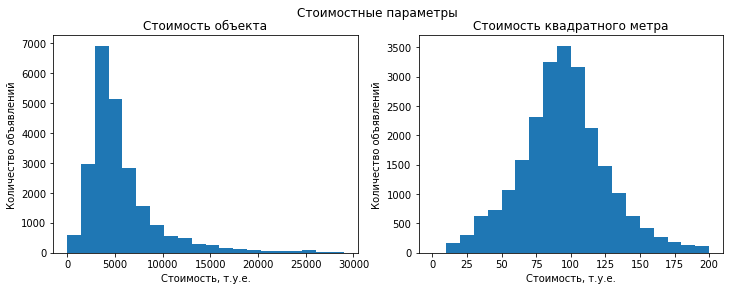

<IPython.core.display.Javascript object>

In [ ]:
_, axs = plt.subplots(1, 2, figsize=(12, 4))

hists_1 = {
    0: ["last_price", "Стоимость объекта", 29000],
    1: ["sq_m_cst", "Стоимость квадратного метра", 200],
}

for i in range(2):
    axs[i].hist(df[hists_1[i][0]], bins=20, range=(0, hists_1[i][2]))
    axs[i].set_title(hists_1[i][1])
    axs[i].set_xlabel("Стоимость, т.у.е.")
    axs[i].set_ylabel("Количество объявлений")

plt.suptitle("Стоимостные параметры")

По полученным графикам хорошо видно, что яркие выбросы в рассмотренном диапазоне значений отсутствуют, при этом обе величины имеют распределение Пуассона. Однако в рассмотренном диапазоне распределение cтоимости квадратного метра близко к нормальному. 

Построим гистограммы для параметров площади, ограничив вывод только значений в диапазоне 2 сигм, что соответствует 95% всех значений.

C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


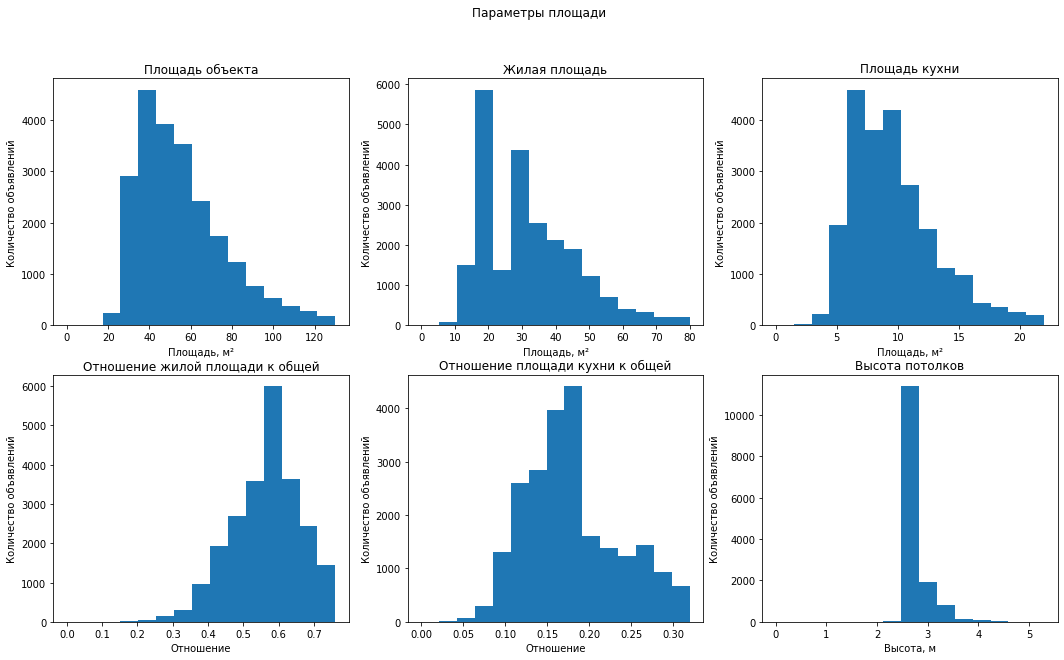

<IPython.core.display.Javascript object>

In [ ]:
_, axs = plt.subplots(2, 3, figsize=(18, 10))

plt.suptitle("Параметры площади")
hists_2 = {
    0: {
        0: ["total_area", "Площадь объекта", 130, "Площадь, м²"],
        1: ["living_area", "Жилая площадь", 80, "Площадь, м²"],
        2: ["kitchen_area", "Площадь кухни", 22, "Площадь, м²"],
    },
    1: {
        0: ["area_ratio_lvn_to_ttl", "Отношение жилой площади к общей", 0.76,"Отношение"],
        1: ["area_ratio_ktchn_to_ttl", "Отношение площади кухни к общей", 0.32,"Отношение"],
        2: ["ceiling_height", "Высота потолков", 5.3,"Высота, м"],
    },
}

for i in range(2):
    for j in range(3):
        axs[i,j].hist(df[hists_2[i][j][0]], bins=15, range=(0, hists_2[i][j][2]))
        axs[i,j].set_title(hists_2[i][j][1])
        axs[i,j].set_xlabel(hists_2[i][j][3])
        axs[i,j].set_ylabel("Количество объявлений")


По полученным гистограммам видно, что распределения абсолютных площадей близко к Пуассоновскому, однако наблюдаются выбросы, которые требуется исследовать.

Распределение относительных площадей близко к нормальному со смещением, но и отношении площади кухни к общей наблюдается неравномерность.

Гистограмма высоты потолков имеет очень узкий пик, соответствующий полученному выше описанию столбца. Большая часть значений лежит в диапазоне от 2,5 до 3 м. 

Исследуем неравномерность распределения значений площади, выведя гистограммы с разделением данных на количество комнат: 
* одна и менее (вместе со студиями и объектами с открытой планировкой), 
* две комнаты, 
* три и более.

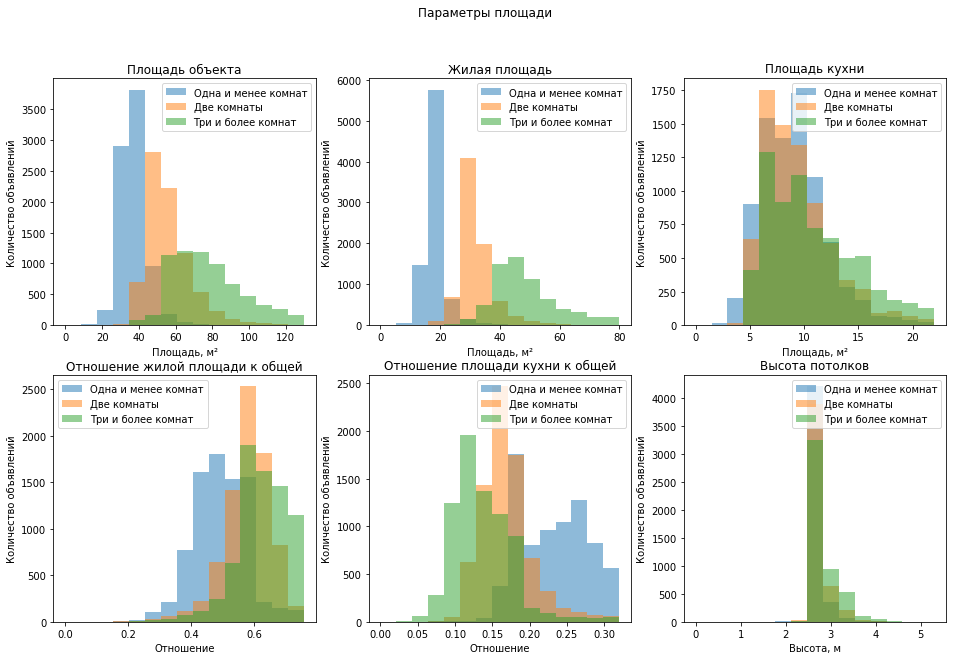

<IPython.core.display.Javascript object>

In [ ]:
_, axs = plt.subplots(2, 3, figsize=(16, 10))

plt.suptitle("Параметры площади")

for i in range(2):
    for j in range(3):
        axs[i, j].hist(
            df.query("rooms <= 1")[hists_2[i][j][0]],
            bins=15,
            range=(0, hists_2[i][j][2]),
            label=("Одна и менее комнат"),
            alpha=0.5,
        )
        axs[i, j].set_title(hists_2[i][j][1])
        axs[i, j].set_xlabel(hists_2[i][j][3])
        axs[i, j].set_ylabel("Количество объявлений")
for i in range(2):
    for j in range(3):
        axs[i, j].hist(
            df.query("rooms == 2")[hists_2[i][j][0]],
            bins=15,
            range=(0, hists_2[i][j][2]),
            label=("Две комнаты"),
            alpha=0.5,
        )
        axs[i, j].set_title(hists_2[i][j][1])
        axs[i, j].set_xlabel(hists_2[i][j][3])
        axs[i, j].set_ylabel("Количество объявлений")
for i in range(2):
    for j in range(3):
        axs[i, j].hist(
            df.query("rooms >= 3")[hists_2[i][j][0]],
            bins=15,
            range=(0, hists_2[i][j][2]),
            label=("Три и более комнат"),
            alpha=0.5,
        )
        axs[i, j].set_title(hists_2[i][j][1])
        axs[i, j].set_xlabel(hists_2[i][j][3])
        axs[i, j].set_ylabel("Количество объявлений")
        axs[i, j].legend()

По полученным гистограммам хорошо видно, что для каждой категории распределение близко к теоретической форме. При этом пики характеристик абсолютной площади соответствуют пикам, которые ранее казались выбросами аномалиями. Таким образом, проведенная категоризация помогла объяснить неравномерность распределения значений в общем.

**Промежуточный вывод**

Исследование площади, цены, числа комнат, высоты потолков и количества балконов показало, что для оценки стоимости объекта наиболее репрезентативными параметрами являются относительные параметры - стоимость квадратного метра, а также отношения жилой площади и площади кухни к общей площади. 

Также получено, что для уточнения результатов целесообразно вводить категоризацию объектов недвижимости по числу комнат: не более одной, две и не менее трех.

## Исследование времени размещения объявлений

Изучим время продажи объектов.

In [ ]:
df.days_exposition.describe()

count    20434.000000
mean       180.905843
std        219.717326
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<IPython.core.display.Javascript object>

Полученные значения свидетельствуют о большом разбросе данных, с большим СКО и большой разницей между средним и медианой.

Согласно полученным значениям, можно считать очень быстрые продажи - продажи, совершенные менее, чем за 45 дней, а необычно долгие - дольше 236 дней.

Построим гистограмму по 95% данных.

<AxesSubplot:>

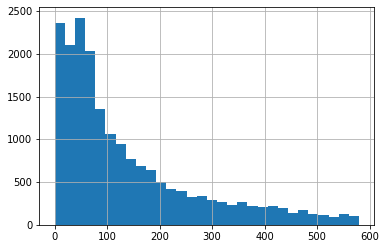

<IPython.core.display.Javascript object>

In [ ]:
df.days_exposition.hist(bins=30, range=(0, 580))

По полученному графику видно, что распределение близко к Пуассоновскому. 

Добавим категоризацию объявление по сроку размещения.

In [ ]:
def det_sale_period(row):
    days_exposition = row["days_exposition"]
    if days_exposition <= 40:
        return "быстрые"
    if days_exposition >= 200:
        return "долгие"
    return "нормальные"

<IPython.core.display.Javascript object>

In [ ]:
df["sale_per_cat"] = df.apply(det_sale_period, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_m_cst,exposition_weekday,exposition_mnth,exposition_year,area_ratio_lvn_to_ttl,area_ratio_ktchn_to_ttl,floor_cat,sity_cat,sale_per_cat
0,20,13000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120,3,3,2019,0.47,0.23,другой,cпб,нормальные
1,7,3350,40.4,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82,1,12,2018,0.46,0.27,первый,пригород топ-10,нормальные
2,10,5196,56.0,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92,3,8,2015,0.61,0.15,другой,cпб,долгие
3,0,64900,159.0,2015-07-24,3,NaN,14,91.730769,9,False,False,False,27.825,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408,4,7,2015,0.58,0.18,другой,cпб,долгие
4,2,10000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100,1,6,2018,0.32,0.41,другой,cпб,нормальные


<IPython.core.display.Javascript object>

Проанализируем влияние стоимости квадратного метра и отношения жилой площади к общей на длительность размещения.

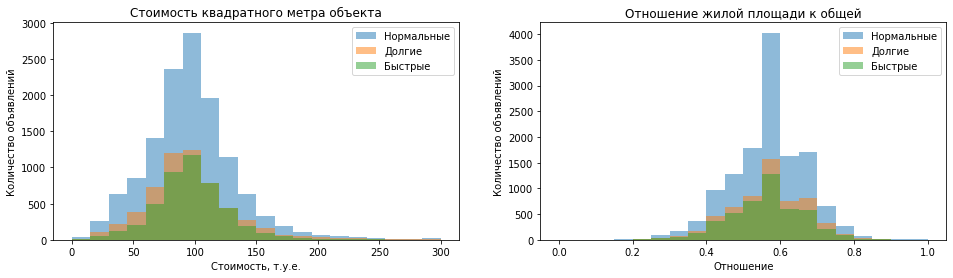

<IPython.core.display.Javascript object>

In [ ]:
hists_3 = ["нормальные", "долгие", "быстрые"]
hists_3_data = {
    0: ["sq_m_cst", "Стоимость, т.у.е.", "Cтоимость квадратного метра объекта", 300],
    1: ["area_ratio_lvn_to_ttl", "Отношение", "Отношение жилой площади к общей", 1],
}


_, axs = plt.subplots(1, 2, figsize=(16, 4))

for j in range(2):
    for i in range(3):
        axs[j].hist(
            df.loc[df["sale_per_cat"] == hists_3[i], hists_3_data[j][0]],
            range=(0, hists_3_data[j][3]),
            bins=20,
            label=hists_3[i].capitalize(),
            alpha=0.5,
        )
        axs[j].set_xlabel(hists_3_data[j][1])
        axs[j].set_ylabel("Количество объявлений")
    axs[j].set_title(hists_3_data[j][2])
    axs[j].legend()

Из полученных данных видно, что характер распределения не изменяется, а значит, на длительность размещений не влияет ни стоимость квадратного метра объекта, ни отношение его жилой площади к общей.

Проанализируем влияние на длительность размещения удаленность от аэропорта и от центра города.

C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


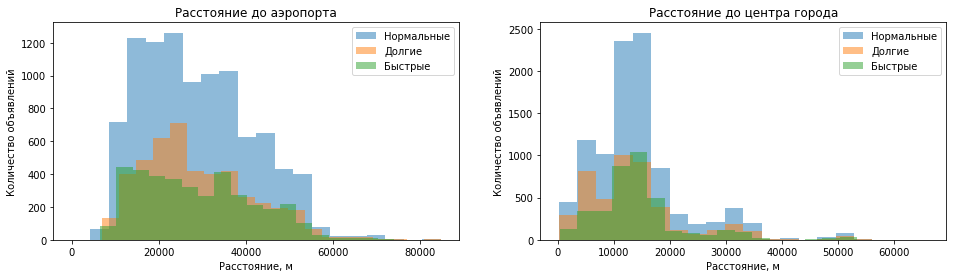

<IPython.core.display.Javascript object>

In [ ]:
hists_4_data = {
    0: ["airports_nearest", "Расстояние до аэропорта"],
    1: ["city_centers_nearest", "Расстояние до центра города"],
}


_, axs = plt.subplots(1, 2, figsize=(16, 4))

for j in range(2):
    for i in range(3):
        axs[j].hist(
            df.loc[df["sale_per_cat"] == hists_3[i], hists_4_data[j][0]],
            bins=20,
            label=hists_3[i].capitalize(),
            alpha=0.5,
        )
        axs[j].set_xlabel("Расстояние, м")
        axs[j].set_ylabel("Количество объявлений")
    axs[j].set_title(hists_4_data[j][1])
    axs[j].legend()

По полученным гистограммам видно, что есть определенные районы города, для которых характерно более длительное время продажи - около 25 км от аэропорта и 5 км от центра. При этом, быстрые продажи чаще осуществляется ближе к аэропорту, нежели к центру города.

**Промежуточный вывод**

Время размещения объявления - параметр с очень большим разбросом значений, который в большей степени зависит от расположения объекта, нежели от его стоимости.

## Влияние параметров объекта на его стоимость

Анализ влияния на стоимость различных параметров будем проводить при помощи функции, упрощающей построение гистограмм.

In [ ]:
def hist_costs_in_range(column_det, min, max, df=df):
    _, axs = plt.subplots(1, 2, figsize=(16, 4))

    for i in range(2):
        axs[i].hist(
            df.loc[df[column_det] <= min, hists_1[i][0]],
            bins=20,
            range=(0, hists_1[i][2]),
            label=(f"Менее {min}"),
            alpha=0.5,
        )
        axs[i].set_title(hists_1[i][1])
        axs[i].set_xlabel("Стоимость, т.у.е.")
        axs[i].set_ylabel("Количество объявлений")
        axs[i].axvline(
            df.loc[df[column_det] <= min, hists_1[i][0]].mean(),
            color="b",
            linestyle="dashed",
            linewidth=1,
        )

    for i in range(2):
        axs[i].hist(
            df.loc[(df[column_det] > min) & (df[column_det] <= max), hists_1[i][0]],
            bins=20,
            range=(0, hists_1[i][2]),
            label=(f"Более {min}, но менее {max}"),
            alpha=0.5,
        )
        axs[i].set_title(hists_1[i][1])
        axs[i].set_xlabel("Стоимость, т.у.е.")
        axs[i].set_ylabel("Количество объявлений")
        axs[i].axvline(
            df.loc[
                (df[column_det] > min) & (df[column_det] <= max), hists_1[i][0]
            ].mean(),
            color="r",
            linestyle="dashed",
            linewidth=1,
        )

    for i in range(2):
        axs[i].hist(
            df.loc[df[column_det] > max, hists_1[i][0]],
            bins=20,
            range=(0, hists_1[i][2]),
            label=(f"Более {max}"),
            alpha=0.5,
        )
        axs[i].set_title(hists_1[i][1])
        axs[i].set_xlabel("Стоимость, т.у.е.")
        axs[i].set_ylabel("Количество объявлений")
        axs[i].axvline(
            df.loc[df[column_det] > max, hists_1[i][0]].mean(),
            color="g",
            linestyle="dashed",
            linewidth=1,
        )
        axs[i].legend()

<IPython.core.display.Javascript object>

Оценим влияние количества комнат на стоимость.

Text(0.5, 0.98, 'Влияние количества комнат на стоимость')

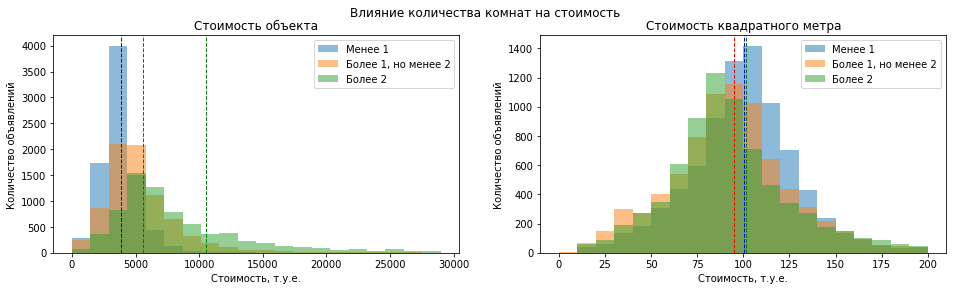

<IPython.core.display.Javascript object>

In [ ]:
hist_costs_in_range("rooms", min=1, max=2)
plt.suptitle("Влияние количества комнат на стоимость")

Штриховые вертикальные линии на графике соответствуют медианному значению соответствующего среза.

По полученным графикам хорошо видно изменение характера распределения стоимости от количества комнат. Чем их меньше - тем меньше общая стоимость объекта и тем больше стоимость квадратного метра. И наоборот.

Оценим влияние площади на стоимость. Диапазоны выберем в соответствии с квартилями.

Text(0.5, 0.98, 'Влияние общей площади объекта на стоимость')

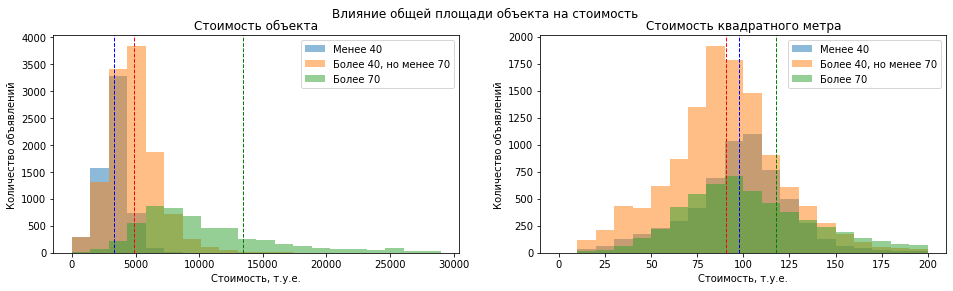

<IPython.core.display.Javascript object>

In [ ]:
hist_costs_in_range("total_area", 40, 70)
plt.suptitle("Влияние общей площади объекта на стоимость")

Полученные результаты соответствуют результатам анализа влияния на стоимость количества комнат, так как последние связаны с общей площадью объектов. Примечательно, что не смотря на высокую медианную стоимость больших объектов в абсолютном отношении, медианная стоимость квадратного метра для них очень близка к соответствующей стоимости маленьких объектов.

Оценим влияние удаленности объекта от центра города. Диапазон выберем, основываясь на квартилях.

In [ ]:
df.city_centers_nearest.describe()

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Влияние удаленности объекта от центра на стоимость')

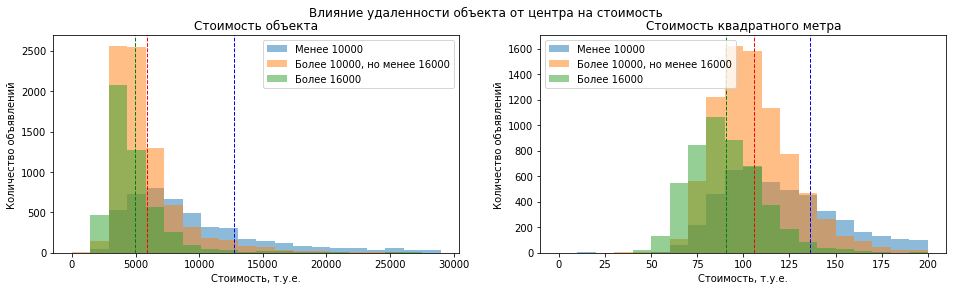

<IPython.core.display.Javascript object>

In [ ]:
hist_costs_in_range("city_centers_nearest", 10000, 16000)
plt.suptitle("Влияние удаленности объекта от центра на стоимость")

По гистограммам видно, что стоимость как абсолютная, так и относительная тем выше, чем ближе объект находится к центру города.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [ ]:
def hist_cost_floor(df=df):
    _, axs = plt.subplots(1, 2, figsize=(16, 4))

    for i in range(2):
        axs[i].hist(
            df.loc[df["floor_cat"] == "первый", hists_1[i][0]],
            bins=20,
            range=(0, hists_1[i][2]),
            label=("Первый"),
            alpha=0.5,
        )
        axs[i].set_title(hists_1[i][1])
        axs[i].set_xlabel("Стоимость, т.у.е.")
        axs[i].set_ylabel("Количество объявлений")
        axs[i].axvline(
            df.loc[df["floor_cat"] == "первый", hists_1[i][0]].median(),
            color="b",
            linestyle="dashed",
            linewidth=1,
        )

    for i in range(2):
        axs[i].hist(
            df.loc[df["floor_cat"] == "последний", hists_1[i][0]],
            bins=20,
            range=(0, hists_1[i][2]),
            label=("Последний"),
            alpha=0.5,
        )
        axs[i].set_title(hists_1[i][1])
        axs[i].set_xlabel("Стоимость, т.у.е.")
        axs[i].set_ylabel("Количество объявлений")
        axs[i].axvline(
            df.loc[df["floor_cat"] == "последний", hists_1[i][0]].median(),
            color="r",
            linestyle="dashed",
            linewidth=1,
        )

    for i in range(2):
        axs[i].hist(
            df.loc[df["floor_cat"] == "другой", hists_1[i][0]],
            bins=20,
            range=(0, hists_1[i][2]),
            label=("Другой"),
            alpha=0.5,
        )
        axs[i].set_title(hists_1[i][1])
        axs[i].set_xlabel("Стоимость, т.у.е.")
        axs[i].set_ylabel("Количество объявлений")
        axs[i].axvline(
            df.loc[df["floor_cat"] == "другой", hists_1[i][0]].median(),
            color="g",
            linestyle="dashed",
            linewidth=1,
        )
        axs[i].legend()
    plt.suptitle("Влияние этажа объекта на стоимость")

<IPython.core.display.Javascript object>

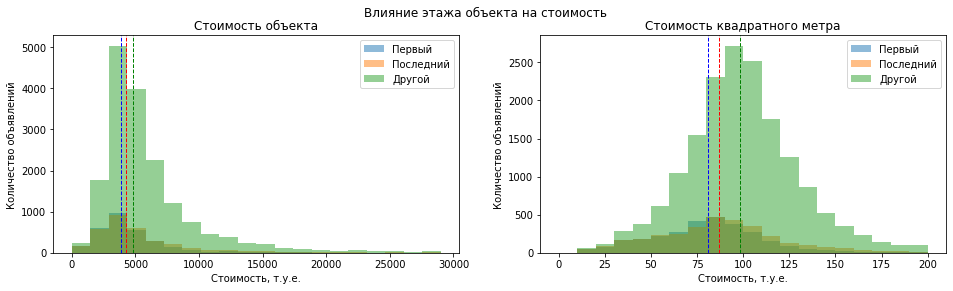

<IPython.core.display.Javascript object>

In [ ]:
hist_cost_floor()

По гистограммам видно, что объявление объектов на "других" этажах существенно больше, чем на первом или последнем. Однако их медианная стоимость меньше, как в относительном, так и в абсолютном выражении. 

Изучим влияние времени размещения (день недели, месяц, год) на стоимость объекта.

In [ ]:
df.pivot_table(
    index="exposition_weekday",
    values=["last_price", "sq_m_cst"],
    aggfunc=["median", "mean", "count"],
)

median                  mean                 count  \
                   last_price sq_m_cst   last_price   sq_m_cst last_price   
exposition_weekday                                                          
0                      4650.0       94  6520.436076  98.984992       3598   
1                      4725.0       95  6391.141315  99.224568       4168   
2                      4700.0       95  6631.784378  99.120324       3956   
3                      4650.0       95  6704.371849  99.698880       4284   
4                      4577.5       94  6367.259529  98.469408       3988   
5                      4550.0       93  6983.119729  98.564289       1921   
6                      4540.0       94  6238.956213  97.213609       1690   

                             
                   sq_m_cst  
exposition_weekday           
0                      3598  
1                      4168  
2                      3956  
3                      4284  
4                      3988  
5                      1921  
6                      1690

<IPython.core.display.Javascript object>

In [ ]:
df.pivot_table(
    index="exposition_mnth",
    values=["last_price", "sq_m_cst"],
    aggfunc=["median", "mean", "count"],
)

median                  mean                  count  \
                last_price sq_m_cst   last_price    sq_m_cst last_price   
exposition_mnth                                                           
1                   4600.0       95  6667.880936   99.291639       1495   
2                   4650.0       95  6467.971179   98.293895       2637   
3                   4650.0       95  6356.256977   98.450000       2580   
4                   4800.0       96  6739.193562  101.508259       2361   
5                   4500.0       92  6597.770570   98.035601       1264   
6                   4400.0       92  6315.964041   97.299658       1752   
7                   4650.0       95  6649.749852   99.189093       1687   
8                   4570.0       96  6343.168868   99.594486       1741   
9                   4700.0       95  6835.411854  100.012665       1974   
10                  4572.5       94  6238.719905   97.391469       2110   
11                  4700.0       95  6450.297080   98.743970       2363   
12                  4700.0       94  7011.714199   99.089580       1641   

                          
                sq_m_cst  
exposition_mnth           
1                   1495  
2                   2637  
3                   2580  
4                   2361  
5                   1264  
6                   1752  
7                   1687  
8                   1741  
9                   1974  
10                  2110  
11                  2363  
12                  1641

<IPython.core.display.Javascript object>

In [ ]:
df.pivot_table(
    index="exposition_year",
    values=["last_price", "sq_m_cst"],
    aggfunc=["median", "mean", "count"],
)

median                   mean                  count  \
                last_price sq_m_cst    last_price    sq_m_cst last_price   
exposition_year                                                            
2014                7700.0      107  12087.102190  124.343066        137   
2015                5312.5       93   8575.575169  104.051520       1184   
2016                4550.0       91   6827.591386   97.845458       2763   
2017                4500.0       92   6583.327453   97.158030       8163   
2018                4550.0       95   5953.759868   97.282785       8487   
2019                5050.0      103   6779.311390  106.567746       2871   

                          
                sq_m_cst  
exposition_year           
2014                 137  
2015                1184  
2016                2763  
2017                8163  
2018                8487  
2019                2871

<IPython.core.display.Javascript object>

Первое и последнее объявление в датафрейме:

In [ ]:
df.first_day_exposition.min()

Timestamp('2014-11-27 00:00:00')

<IPython.core.display.Javascript object>

In [ ]:
df.first_day_exposition.max()

Timestamp('2019-05-03 00:00:00')

<IPython.core.display.Javascript object>

Из полученных таблиц видно, наиболее часто и наиболее дорогие объявления появляются на рынке в четверг. Это соответствует действительности и объясняется тем, что осмотром объектов людям удобнее заниматься в выходные. В этой связи, лучше за день или два договориться о встрече, а следовательно, именно четверг является наиболее благоприятным днем для размещения объявлений (любых).

Так же видно, что присутствует сезонность - пик активности рынка (количество объявлений) приходится на конец зимы, к лету он спадает, а осенью растет вновь, но к Новому году спадает. Изменение цены повторяет описанную динамику с задержкой в один месяц.

Анализ распределения значений по годам будем проводить, не рассматривая 2014 и 2019 года, в связи с тем, что полной картины за эти года нет, а те данные, что есть искажены сезонными изменениями.

В период 2015 и 2016 годов наблюдается снижение медианных значений стоимости, а с 2017 года - рост. При этом, среднее значение стоимости объектов снижалось вплоть до 2018 года. Учитывая, что количество объявлений в год постоянно увеличивается, такое распределение говори о том, что на рынке существует тенденция к продаже большого количества дешевого жилья, а дорого жилья становиться (в относительном плане) меньше. Эта же тенденция может наблюдаться и в изменении уровня жизни в целом. 

**Промежуточные выводы**

Варьирование рассмотренных параметров приводит к смещению среднего и медианного значений выборки. Так, на стоимость объекта в первую очередь влияют: его площадь и удаленность от центра. Число комнат и этаж расположения так же оказывают вклад, но в меньшей степени. 

Наиболее выгодный день для размещения объявления - четверг в конце зимы или начале осени.

С течением времени на рынке усиливается превалирование дешевого жилья над дорогим.

## Исследование стоимости объектов в разных населенных пунктах

Посчитаем среднюю цену квадратного метра в Санкт-Петербурге, населённых пунктах из топ-10, топ-30 и остальных

In [ ]:
df.pivot_table(
    index="sity_cat",
    values=["last_price", "sq_m_cst"],
    aggfunc=["mean", "median", "count"],
)

mean                 median               count  \
                   last_price    sq_m_cst last_price sq_m_cst last_price   
sity_cat                                                                   
cпб               8062.839207  114.357275       5500      104      15691   
обычный пригород  2885.632782   59.436692       2690       59       3325   
пригород топ-10   4410.549064   81.202389       3850       79       3098   
пригород топ-30   3108.044266   61.504359       2800       60       1491   

                           
                 sq_m_cst  
sity_cat                   
cпб                 15691  
обычный пригород     3325  
пригород топ-10      3098  
пригород топ-30      1491

<IPython.core.display.Javascript object>

Из таблицы видно, что для категорий *обычный пригород* и *пригород топ-30* рассчитанные значения практически не изменяются. Такая категоризация излишняя.

в Санкт-Петербурге средняя цена объекта на 45% выше, чем в пригороде из топ-10, а средняя цена квадратного метра - на 29%. Аналогичная картина с медианным значением.

Найдем пригороды из категории *топ-10* с наибольшей и наименьшей стоимостью жилья.

In [ ]:
df.query("sity_cat=='пригород топ-10'")[["last_price", "locality_name"]].sort_values(
    by="last_price"
)

,last_price,locality_name
12536,600,выборг
17298,690,выборг
9471,850,гатчина
20131,950,выборг
18098,965,всеволожск
...,...,...
4978,29000,пушкин
2414,29500,пушкин
5042,35000,пушкин
10569,36900,колпино


<IPython.core.display.Javascript object>

In [ ]:
df.query("sity_cat=='пригород топ-10'")[["sq_m_cst", "locality_name"]].sort_values(
    by="sq_m_cst"
)

,sq_m_cst,locality_name
9471,10,гатчина
23477,10,гатчина
12536,18,выборг
13060,18,гатчина
5837,24,выборг
...,...,...
19852,204,пушкин
14900,206,пушкин
543,225,петергоф
2414,256,пушкин


<IPython.core.display.Javascript object>

Самое дорогой объект в пригороде находится в Пушкине, а самый дешевый - в Выборге. При этом самая высокая цена квадратного метра определена для объектов во Всеволожске, а самая низкая - в Гатчине.

**Промежуточный вывод**

Самые дорогие объекты находятся в Санкт-Петербурге. В близлежащих городах существует большой разброс цен как на сами объекты, так и на квадратный метр. Такие явления могут объясняться разницей в объеме выборки данных, которая измеряется порядками.

## Анализ объектов в центре Санкт-Петербурге

Рассмотрим более детально влияние на стоимость объектов в Санкт-Петербурге их удаление от центра города. Для этого выделим квартиры в Санкт-Петербурге в отдельный датафрейм, создадим столбец с расстоянием до центра в километрах с округлите до целых значений. После этого посчитаем среднюю цену для каждого километра и построим график. 

C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Стоимость объектов от удаления от центра'}, xlabel='Дистанция, км', ylabel='Стоимость, т.у.е.'>

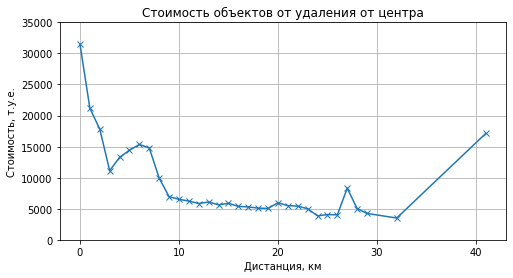

<IPython.core.display.Javascript object>

In [ ]:
df_spb = df.loc[(df["sity_cat"] == "cпб") & (df["city_centers_nearest"].notna())]
df_spb["city_centers_nearest_km"] = (
    (df_spb["city_centers_nearest"] / 1000).round().astype(int)
)
df_spb.pivot_table(
    index="city_centers_nearest_km",
    values=["last_price"],
    aggfunc=["mean"],
).plot(
    figsize=(8, 4),
    grid=True,
    ylim=(0, 35000),
    legend=False,
    title="Стоимость объектов от удаления от центра",
    xlabel="Дистанция, км",
    ylabel="Стоимость, т.у.е.",
    style="x-",
)

По графику видно, что в самом центре стоимость объектов высокая, но за 3 километра стремительно снижается. Далее наблюдается рост стоимости до удаления на 6 километров и опять снижение. На удалении, равном 9 километрам виден излом характеристики, после которого зависимость стоимости объектов от удаления от центра значительно меньше (за исключением выбросов на 27 и 41 километре).

Рассмотрим более подробно распределение влияния проанализированных выше параметров на сегмент объектов в радиусе 9 километров от центра. Выведем информацию по основным параметрам объекта.

In [ ]:
df_centr = df_spb.query("city_centers_nearest_km <= 9")
df_centr[
    [
        "last_price",
        "sq_m_cst",
        "total_area",
        "living_area",
        "kitchen_area",
        "area_ratio_lvn_to_ttl",
        "area_ratio_ktchn_to_ttl",
        "rooms",
        "ceiling_height",
        "balcony",
    ]
].describe()

,last_price,sq_m_cst,total_area,living_area,kitchen_area,area_ratio_lvn_to_ttl,area_ratio_ktchn_to_ttl,rooms,ceiling_height,balcony
count,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,3085.000000,4726.000000
mean,13243.538299,138.103893,86.318199,50.717858,13.874472,0.578917,0.175702,2.670969,3.086269,0.370715
std,22218.993432,83.767671,56.721525,35.899886,9.235337,0.108850,0.078266,1.392752,1.985859,0.810579
min,12.000000,0.000000,12.000000,2.000000,2.000000,0.020000,0.030000,0.000000,2.000000,0.000000
25%,5950.000000,98.000000,51.000000,29.000000,8.400000,0.520000,0.120000,2.000000,2.750000,0.000000
50%,8500.000000,120.000000,72.600000,42.250000,11.367500,0.580000,0.160000,3.000000,3.000000,0.000000
75%,13000.000000,149.000000,101.875000,61.000000,16.000000,0.650000,0.200000,3.000000,3.200000,0.000000
max,763000.000000,1907.000000,900.000000,409.700000,112.000000,0.980000,0.640000,19.000000,100.000000,5.000000


<IPython.core.display.Javascript object>

Сравнивая с аналогичными значениями по всему датафрейму видно, что в центре находится 20% всех объектов. При этом средняя цена выше почти в 2 раза, а стоимость квадратного метра - почти на треть. Абсолютная площадь объектов так же выше на треть, в то же время относительные коэффициенты оказываются более устойчивыми к таким срезам - изменение их параметров не превосходит 2%. Высота потолков в центре выше 12%, а вот балконов практически нет.

Построим гистограммы, аналогичные тем, что строились ранее.

Text(0.5, 0.98, 'Влияние количества комнат на стоимость')

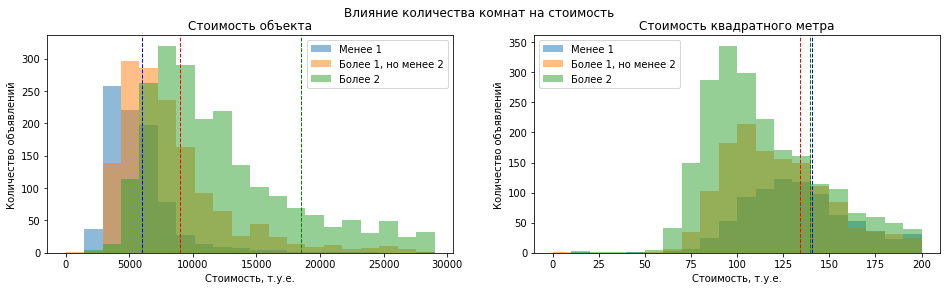

<IPython.core.display.Javascript object>

In [ ]:
hist_costs_in_range("rooms", min=1, max=2, df=df_centr)
plt.suptitle("Влияние количества комнат на стоимость")

Text(0.5, 0.98, 'Влияние общей площади объекта на стоимость')

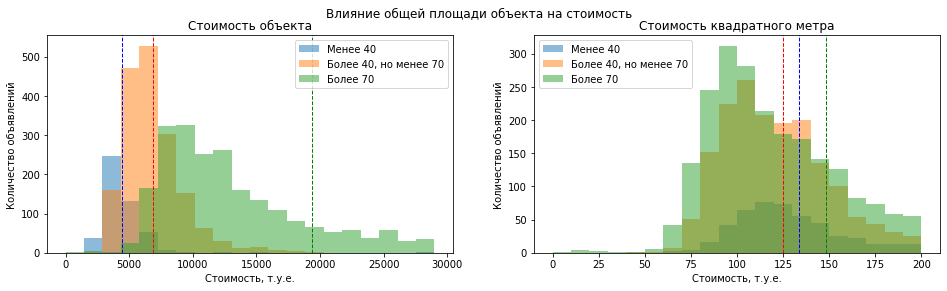

<IPython.core.display.Javascript object>

In [ ]:
hist_costs_in_range("total_area", 40, 70, df=df_centr)
plt.suptitle("Влияние общей площади объекта на стоимость")

Text(0.5, 0.98, 'Влияние удаленности объекта от центра на стоимость')

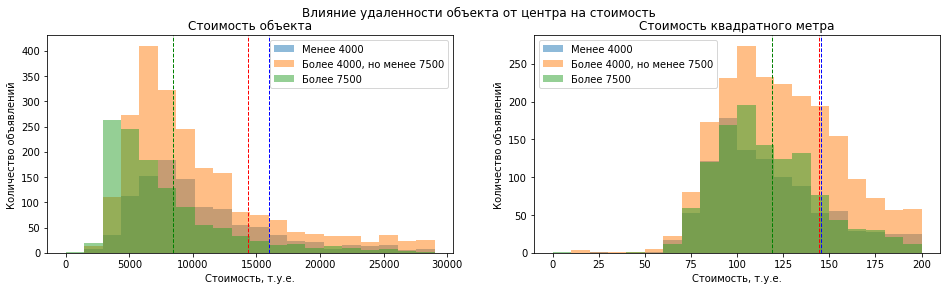

<IPython.core.display.Javascript object>

In [ ]:
hist_costs_in_range("city_centers_nearest", 4000, 7500, df=df_centr)
plt.suptitle("Влияние удаленности объекта от центра на стоимость")

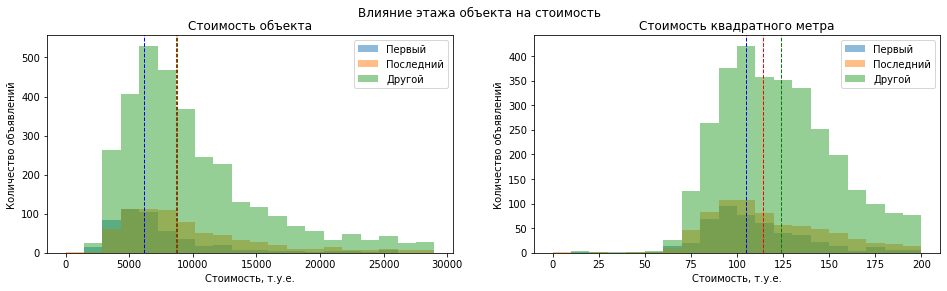

<IPython.core.display.Javascript object>

In [ ]:
hist_cost_floor(df=df_centr)

По гистограммам видно, что влияние каждого параметра на объекты в центре выше, чем на объекты во всем датафрейме. Особенно это заметно на гистограммах количества комнат и площади объектов в различных отстояниях медианных значений друг от друга. 

Выведем информацию о времени размещения объектов в центре.

In [ ]:
df_centr.pivot_table(
    index="exposition_weekday",
    values=["last_price", "sq_m_cst"],
    aggfunc=["median", "mean", "count"],
)

median                   mean                  count  \
                   last_price sq_m_cst    last_price    sq_m_cst last_price   
exposition_weekday                                                            
0                        8650      120  13097.093535  138.345254        727   
1                        8200      118  12410.265931  137.050245        816   
2                        8550      121  13362.830212  137.267166        801   
3                        8500      119  13130.161053  137.887368        950   
4                        8400      119  12809.939470  136.418663        793   
5                        8000      122  16534.584046  146.410256        351   
6                        8725      124  13199.295139  138.038194        288   

                             
                   sq_m_cst  
exposition_weekday           
0                       727  
1                       816  
2                       801  
3                       950  
4                       793  
5                       351  
6                       288

<IPython.core.display.Javascript object>

In [ ]:
df_centr.pivot_table(
    index="exposition_mnth",
    values=["last_price", "sq_m_cst"],
    aggfunc=["median", "mean", "count"],
)

median                   mean                  count  \
                last_price sq_m_cst    last_price    sq_m_cst last_price   
exposition_mnth                                                            
1                     8470    120.0  13646.571429  138.368771        301   
2                     8442    118.0  13158.041339  136.687008        508   
3                     8400    126.0  12752.233918  138.840156        513   
4                     8150    118.5  13944.015556  145.540000        450   
5                     8300    122.0  12999.817204  132.799283        279   
6                     8262    115.0  12836.773224  137.614754        366   
7                     8751    118.0  13456.647849  138.575269        372   
8                     8524    124.0  12531.468750  139.190341        352   
9                     9000    121.0  14161.627160  137.883951        405   
10                    8313    119.0  11983.828358  133.820896        402   
11                    8900    119.0  12792.314286  135.547253        455   
12                    7700    119.0  15061.105263  141.173375        323   

                          
                sq_m_cst  
exposition_mnth           
1                    301  
2                    508  
3                    513  
4                    450  
5                    279  
6                    366  
7                    372  
8                    352  
9                    405  
10                   402  
11                   455  
12                   323

<IPython.core.display.Javascript object>

In [ ]:
df_centr.pivot_table(
    index="exposition_year",
    values=["last_price", "sq_m_cst"],
    aggfunc=["median", "mean", "count"],
)

median                   mean                  count  \
                last_price sq_m_cst    last_price    sq_m_cst last_price   
exposition_year                                                            
2014                 15550    141.5  21642.450000  177.075000         40   
2015                  9680    117.0  15634.854220  139.516624        391   
2016                  8750    115.5  14020.755486  138.241379        638   
2017                  8449    117.0  13754.281912  136.355112       1653   
2018                  8150    121.0  11448.411565  134.589116       1470   
2019                  8455    130.0  13295.507491  149.074906        534   

                          
                sq_m_cst  
exposition_year           
2014                  40  
2015                 391  
2016                 638  
2017                1653  
2018                1470  
2019                 534

<IPython.core.display.Javascript object>

По полученным таблицам можно сделать аналогичные выводы, что и ранее. Таким образом, время размещения объявления не зависит от удаленности объекта от центра города.

**Промежуточный вывод**

В центре Санк-Петербурга размещают 20% объявлений всех объектов. При этом средняя цена выше почти в 2 раза, а стоимость квадратного метра - почти на треть. Абсолютная площадь объектов так же выше на треть, в то же время относительные коэффициенты оказываются более устойчивыми к таким срезам - изменение их параметров не превосходит 2%. Высота потолков в центре выше 12%, а вот балконов практически нет. 
Влияние каждого параметра на объекты в центре выше, чем на объекты во всем городе и области. Особенно это заметно на количестве комнат и площади объектов: медианные значения по категориям которых отличаются, в среднем, на 35%. 

# Вывод

Проведено исследование архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет.

В ходе предобработки данных исправлены наименований столбцов, исключены дубликаты, обработаны пропуски и исправлены типы данных. В результате указанных действий количество строк уменьшилось на 4%, но в таблице сохранены пропуски, которые не должны оказывать значительного влияния на точность и наглядность исследования. 

Установлены следующие параметры для определения рыночной стоимости объектов недвижимости.
* Площадь и удаленность от центра - влияют в первую очередь на стоимость объекта. 
* Число комнат и этаж расположения - оказывают вклад, но в меньшей степени. 
* Район города - например, перечисленные параметры влияют на стоимость объектов в центре Санкт-Петербурга значительно выше, чем на объекты во всем датафрейме. 
* Относительные параметры, такие как стоимость квадратного метра, а также отношения жилой площади и площади кухни к общей площади - наиболее репрезентативны и устойчивы к внешним изменениям. 

Также установлено, что с течением времени на рынке усиливается превалирование дешевого жилья над дорогим.

В центре Санк-Петербурга размещают 20% объявлений всех объектов. При этом средняя цена выше почти в 2 раза, а стоимость квадратного метра - почти на треть. Абсолютная площадь объектов так же выше на треть, в то же время относительные коэффициенты оказываются более устойчивыми к таким срезам - изменение их параметров не превосходит 2%. Высота потолков в центре выше 12%, а вот балконов практически нет. 
Влияние каждого параметра на объекты в центре выше, чем на объекты во всем городе и области. Особенно это заметно на количестве комнат и площади объектов: медианные значения по категориям которых отличаются, в среднем, на 35%. 

Полученные результаты могут быть использованы для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.